## Analise do conjunto de dados do Airbnb

1. Dataset e explicação do conjunto de dados AB_NYC_2019.csv disponível em:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/

2. Link direto para download do arquivo AB_NYC_2019.csv:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

3. Dados fictícios para construção do gráfico da Questão 4.d:
https://drive.google.com/file/d/1GoKp1WfVSKvNlJhWI7hzFwraC_j9rXon/view?usp=sharing

## Ferramenta utilizada para visualização dos dados e a ingestão do dataset

 Optei por utilzar a ferramenta Anaconda Navigator e o Jupyter notebook por que conforme a documentação o Jupyter Notebook é uma ferramenta de Literate Computing, extremamente eficientes, pois permitem unir código e texto. Assim cada funcionalidade pode ser explicada detalhadamente. 
 
 Você também pode gerar gráficos “vivos” gerados em tempo real dentro da ferramenta e utiliza como linguagem 
 o Python.
 

In [1]:
# importando bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import iqr

In [9]:
# iniciando a coleta dos dados
# Carregar os arquivos csv para os DataFrames

df = pd.read_csv('AB_NYC_2019.csv', sep=',')
df1 = pd.read_csv('dados_teste_analistaDados.csv', sep=',')

# Exibir as 5 primeiras linhas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df1.head()

,data,reviews
0,2016-09-01,3
1,2016-10-01,2
2,2016-11-01,2
3,2016-12-01,6
4,2017-01-01,3


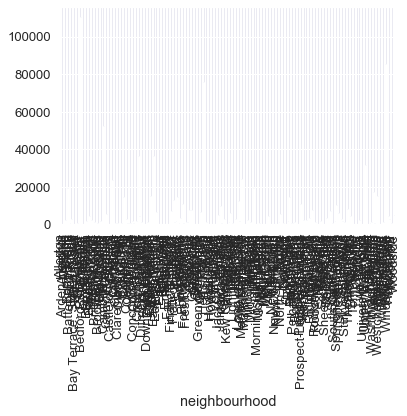

In [48]:
# Questão 4a
# Gráfico de barras agrupando pela coluna neighbourhood
# Utilizei gráfico de barras pois evidência de forma mais clara a progressão dos dados/variaveis
df.groupby(['neighbourhood']).sum()['number_of_reviews'].plot(kind = 'bar')
plt.show()

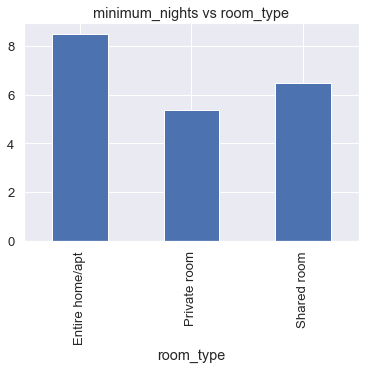

In [49]:
# Questão 4b
# Média da coluna minimum_nights agrupado pela coluna room_type
df.groupby(['room_type']).mean()['minimum_nights'].plot.bar(title='minimum_nights vs room_type')
def get_stats(self, low=0, high=None):
        means = np.mean(self.hist, axis=0)    
        stds = np.std(self.hist, axis=0)
        return means[low:high], stds[low:high] 
plt.show()


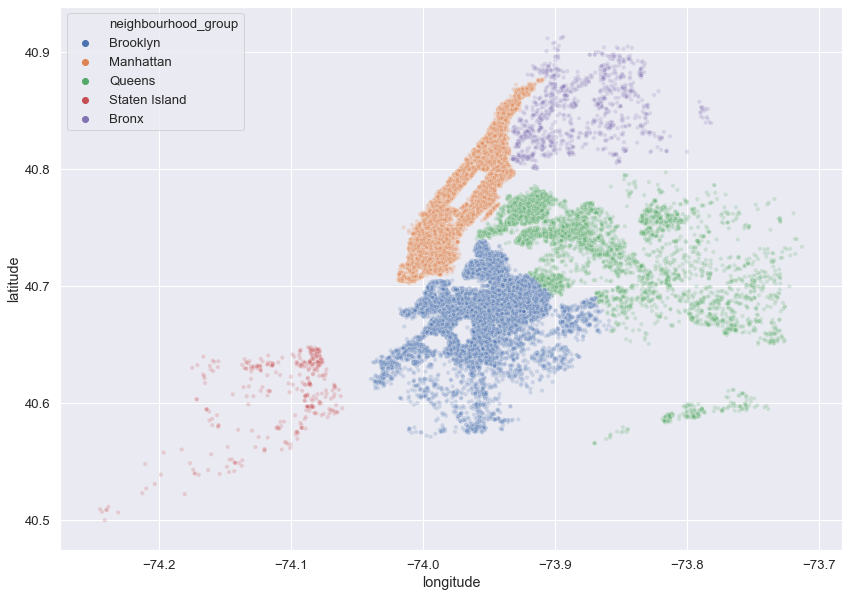

In [64]:
# Questão 4c
# Utilizando as colunas latitude e longitude, crie uma visualização geográfica (mapa)
# dos hosts presentes no dataset (0,5 ponto). Enriqueça o mapa com a utilização de
# cores e/ou tamanho de ponto diferenciado para outras características como preço,
# número mínimo de noites, número de reviews, tipo de quarto, por exemplo
# Gerado um HeatMap evidenciando aonde tem maiores host para alugar

fig, ax = plt.subplots(figsize = (14,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', ax = ax, s = 20, alpha = 0.2, data=df);


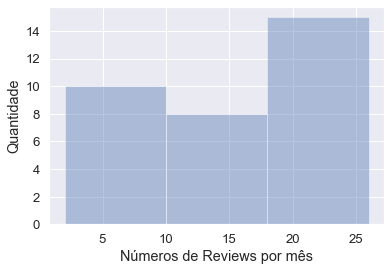

In [63]:
# Questão 4d

sns.distplot(df1['reviews'],kde=False)
plt.ylabel('Quantidade')
plt.xlabel('Números de Reviews por mês')
plt.show()